[연습문제 10.2.1]

(1) 붓꽃 데이터에서 꽃잎의 길이(petal length)의 최솟값과 최댓값 구간을 0.05 간격으로 나누어 각각의 값을 기준값으로 하였을 때 조건부엔트로피가 어떻게 변하는지 그래프로 그려라.

(2) 꽃잎의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
x = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(x, columns=iris.feature_names)
df['spcecies'] = iris.target[idx]

In [2]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spcecies
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1


In [3]:
max_ = df['petal length (cm)'].max()
max_

6.9

In [4]:
min_ = df['petal length (cm)'].min()
min_

3.0

In [5]:
np.arange(min_, max_ + 0.05, 0.05)

array([3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 ,
       3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05,
       4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 ,
       4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15,
       5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 ,
       5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25,
       6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 ,
       6.85, 6.9 ])

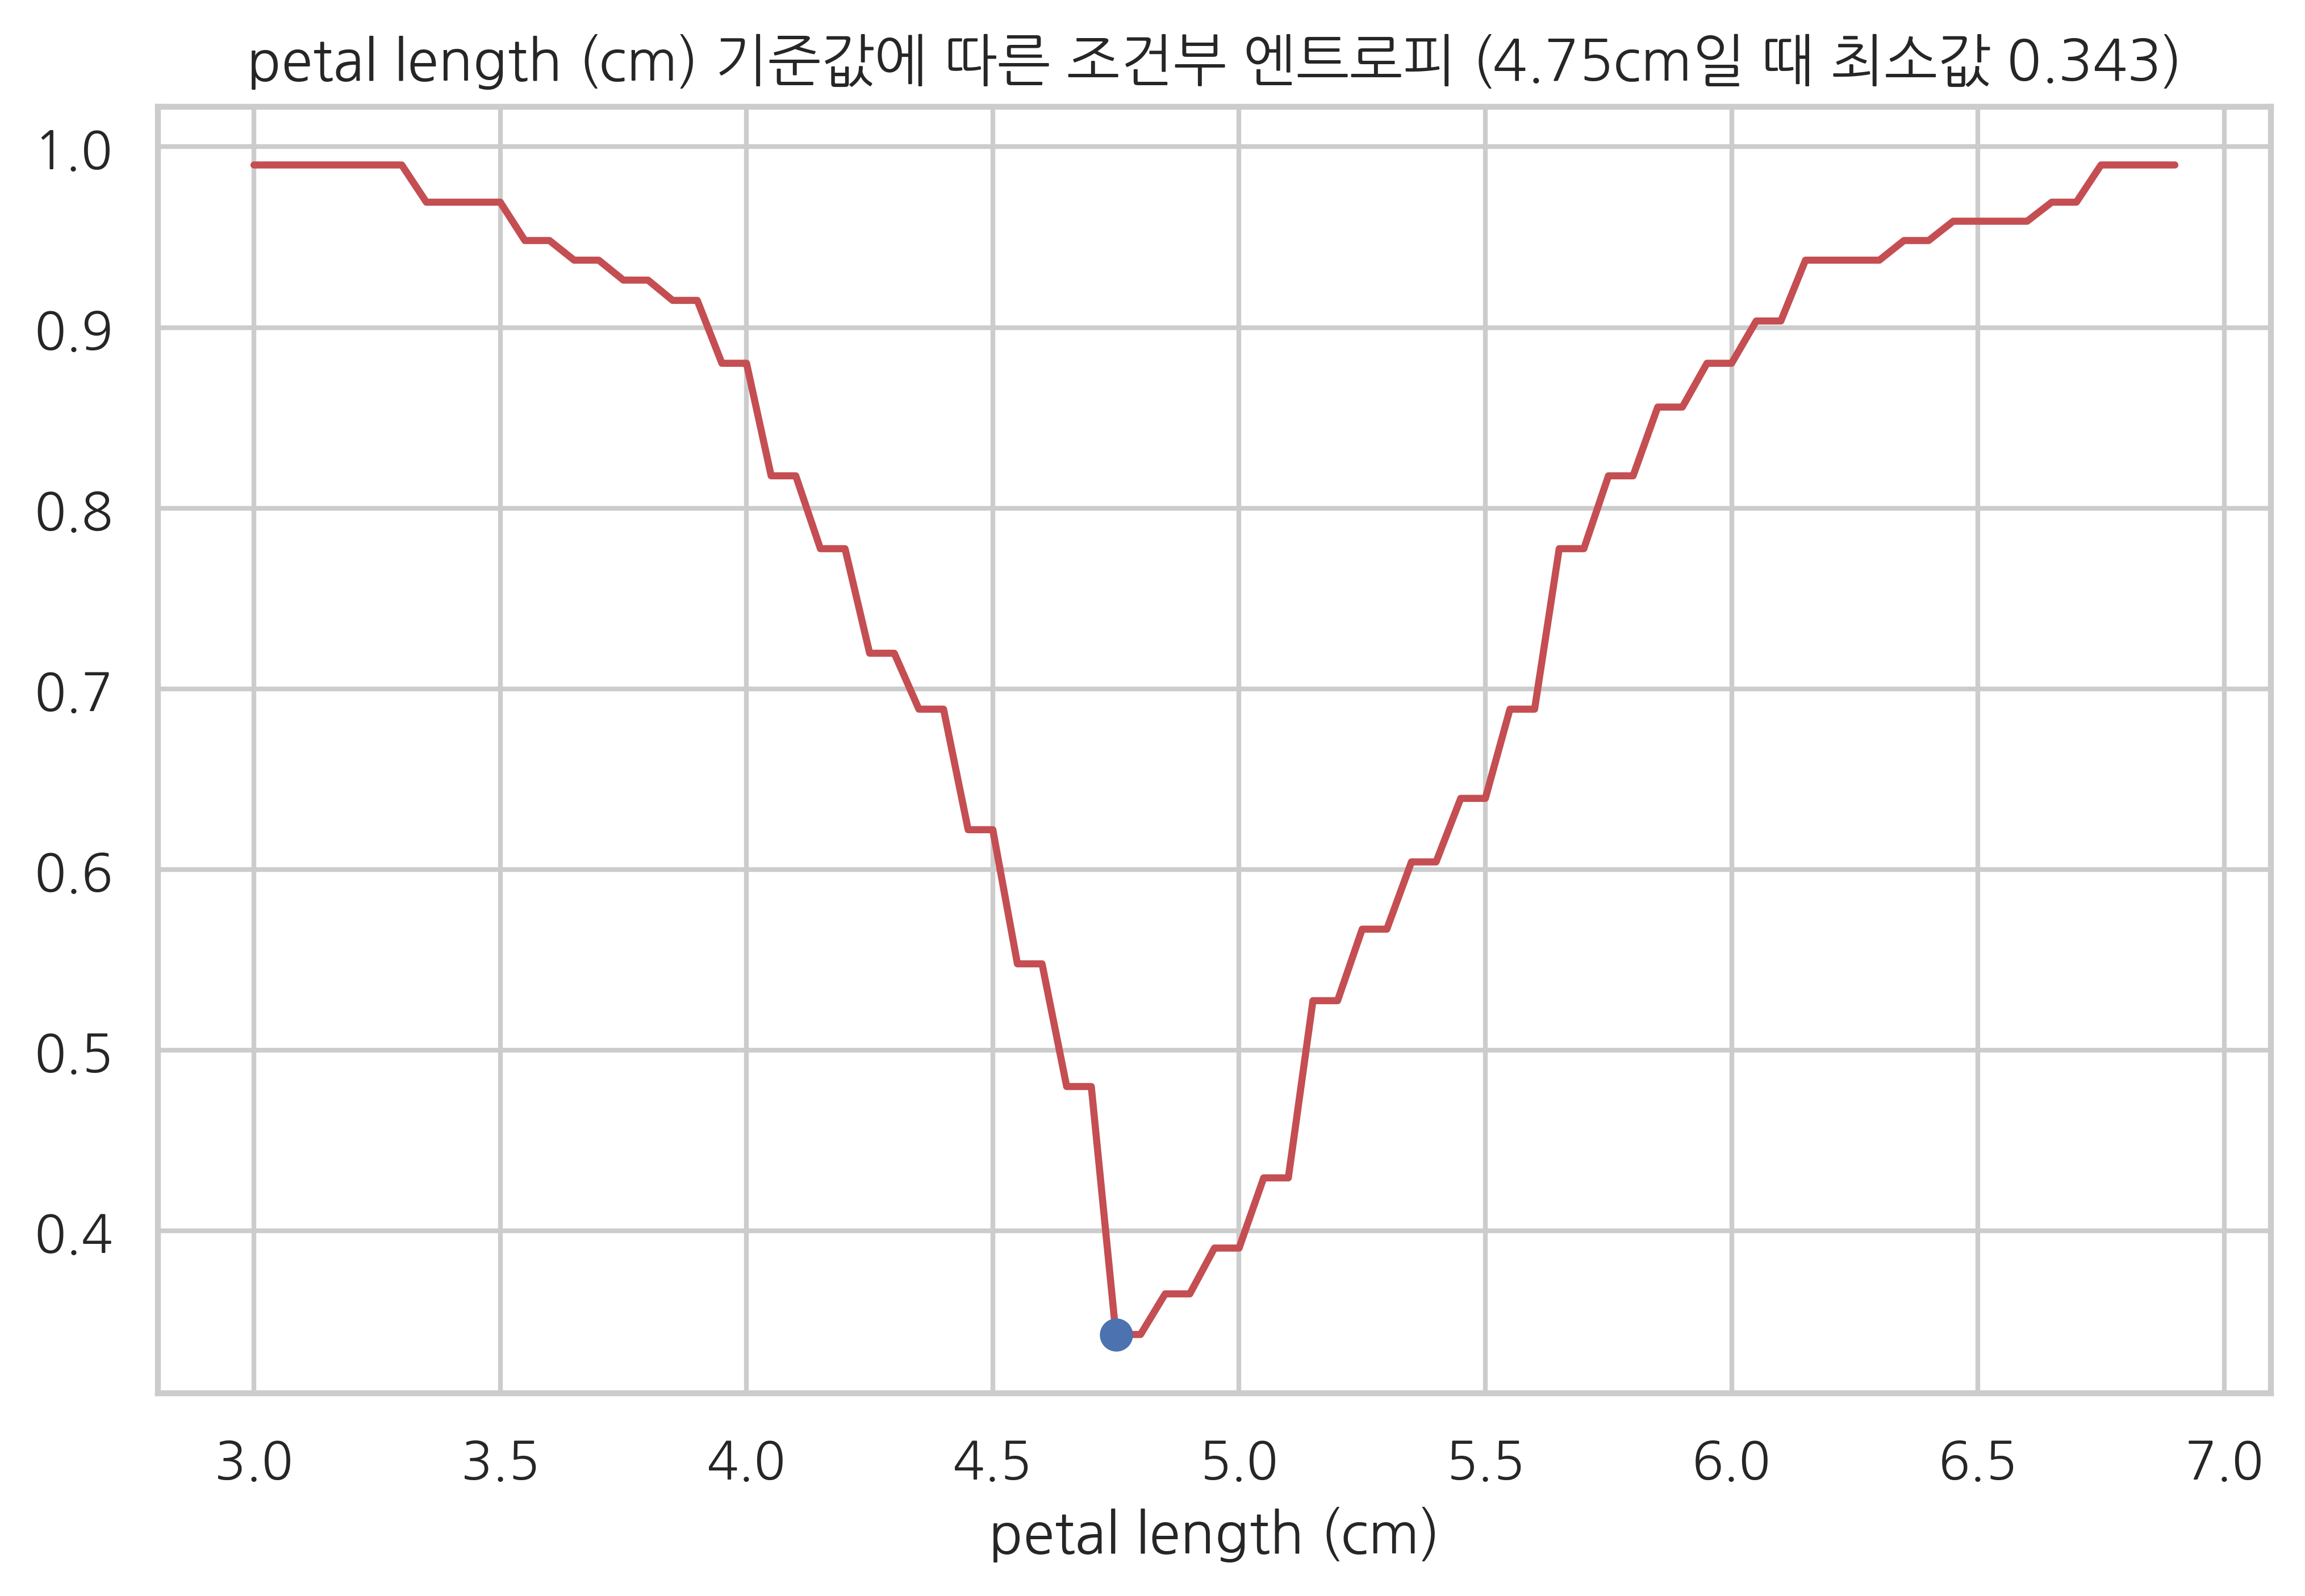

In [6]:
def calc_cond_entropies(col, threshold):
    df['X1'] = df[col] > threshold
    pivot_table1 = df.groupby(['X1', 'spcecies']).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    
    cond_entropies = []
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
        
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    plt.plot(th_range, cond_entropies, 'r-')
    plt.plot(th_min, ce_min, 'bo')
    title = '{} 기준값에 따른 조건부 엔트로피 ({:.3}cm일 때 최소값 {:.3})'.format(col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()

plot_min_cond_entropy('petal length (cm)')

In [ ]:
# 꽃잎의 기준으로 했을 때 : 4.75 cm 일 때 조건부 엔트로피 최솟값 0.343

카테고리변수
- 축소랭크방식의 장점. 상수항과 변수의 가중치는 상수항에 더해진 값


In [11]:
data = sm.datasets.get_rdataset('PlantGrowth')
df = data.data
df.tail()

,weight,group
25,5.29,trt2
26,4.92,trt2
27,6.15,trt2
28,5.80,trt2
29,5.26,trt2


In [12]:
model = sm.OLS.from_formula('weight ~ group + 0', df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0159
Time:                        22:38:25   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
group[ctrl]     5.0320      0.197     25.527      

- crtl : 대조군(아무것도 안한 것)
- trt : 비교군(어떤 조치를 취한 것)

이 데이터의 경우, reduced rank방식으로 하는 것이 더 적합하다.
- trt1의 계수가 0이하이므로, trt1을 취하면 덜 자랄 것이다 그런데 p-value를 보면 19%로 크므로, 계수는 0이다.(귀무가설 채택)
- trt2는 유의확률 8%이므로 더 잘자란다는 것이 맞다. 

In [13]:
model1 = sm.OLS.from_formula('weight ~ group', df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0159
Time:                        22:38:25   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0320      0.197     25.527

자동차 도로 테스트 데이터

In [14]:
data = sm.datasets.get_rdataset('mtcars')
df = data.data
df.tail(2)
# mpg: 갤런당 마일(연비 회귀분석)
# cyl: 실린더 개수, disp:배기량, hp:총 마력, drat: 후방엑셀비율
# wt:무게(파운드), qsec: 1/4mile 가는데 필요한 시간, vs: 엔진모양(0:V, 1:ㅡ)
# am: 0:오토, 1:스틱, gear: 전진기어 단계개수, carb:카뷰레이터 개수

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [16]:
# columns = list(df.columns)
# columns =  ["scale({})".format(name) for name in columns]
# model = sm.OLS.from_formula('mpg ~'+'+'.join(columns), df)
# result = model.fit()
# print(result.summary())

종속변수 포함 X
카테고리는 스케일링 X
C(변수명)

- 변수를 실수로 가정: 선형
- 변수를 카테고리로 가정: 비선형

#### 풀랭크 방식 : intercept가 없다
- cyl만 풀랭크 방식으로 하고, vs, am, gear, carb는 축소랭크방식으로 계산.
- 기준이 되는 차 3가지 : cyl=4, cyl=6, cyl=8
- 다른 변수에 대한 coef를 모두 더해줘야 해서 번거로움.

In [17]:
model = sm.OLS.from_formula('mpg ~ C(cyl) + scale(disp) + scale(hp) + scale(drat) + scale(wt) + scale(qsec) + C(vs) + C(am) + C(gear) + C(carb) + 0', df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7.830
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000124
Time:                        22:38:56   Log-Likelihood:                -66.608
No. Observations:                  32   AIC:                             167.2
Df Residuals:                      15   BIC:                             192.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(cyl)[4]       17.9842      5.324      3.378   

#### 축소랭크방식 : 카테고리 변수가 2개 이상인 경우 관례적으로 reduced rank 사용

- intercept(기준) : cyl = 4, vs = 0, am = 0, gear = 3, carb = 1 인 차의 연비. 
- cyl 유의하지 않다(p-value 크기 때문), am, gear, carb 유의하지 않음

In [18]:
model1 = sm.OLS.from_formula('mpg ~ C(cyl) + scale(disp) + scale(hp) + scale(drat) + scale(wt) + scale(qsec) + C(vs) + C(am) + C(gear) + C(carb)', df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7.830
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000124
Time:                        22:39:42   Log-Likelihood:                -66.608
No. Observations:                  32   AIC:                             167.2
Df Residuals:                      15   BIC:                             192.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.9842      5.324      3.378   

In [19]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result1, fig=fig)
fig.suptitle('')
plt.show()

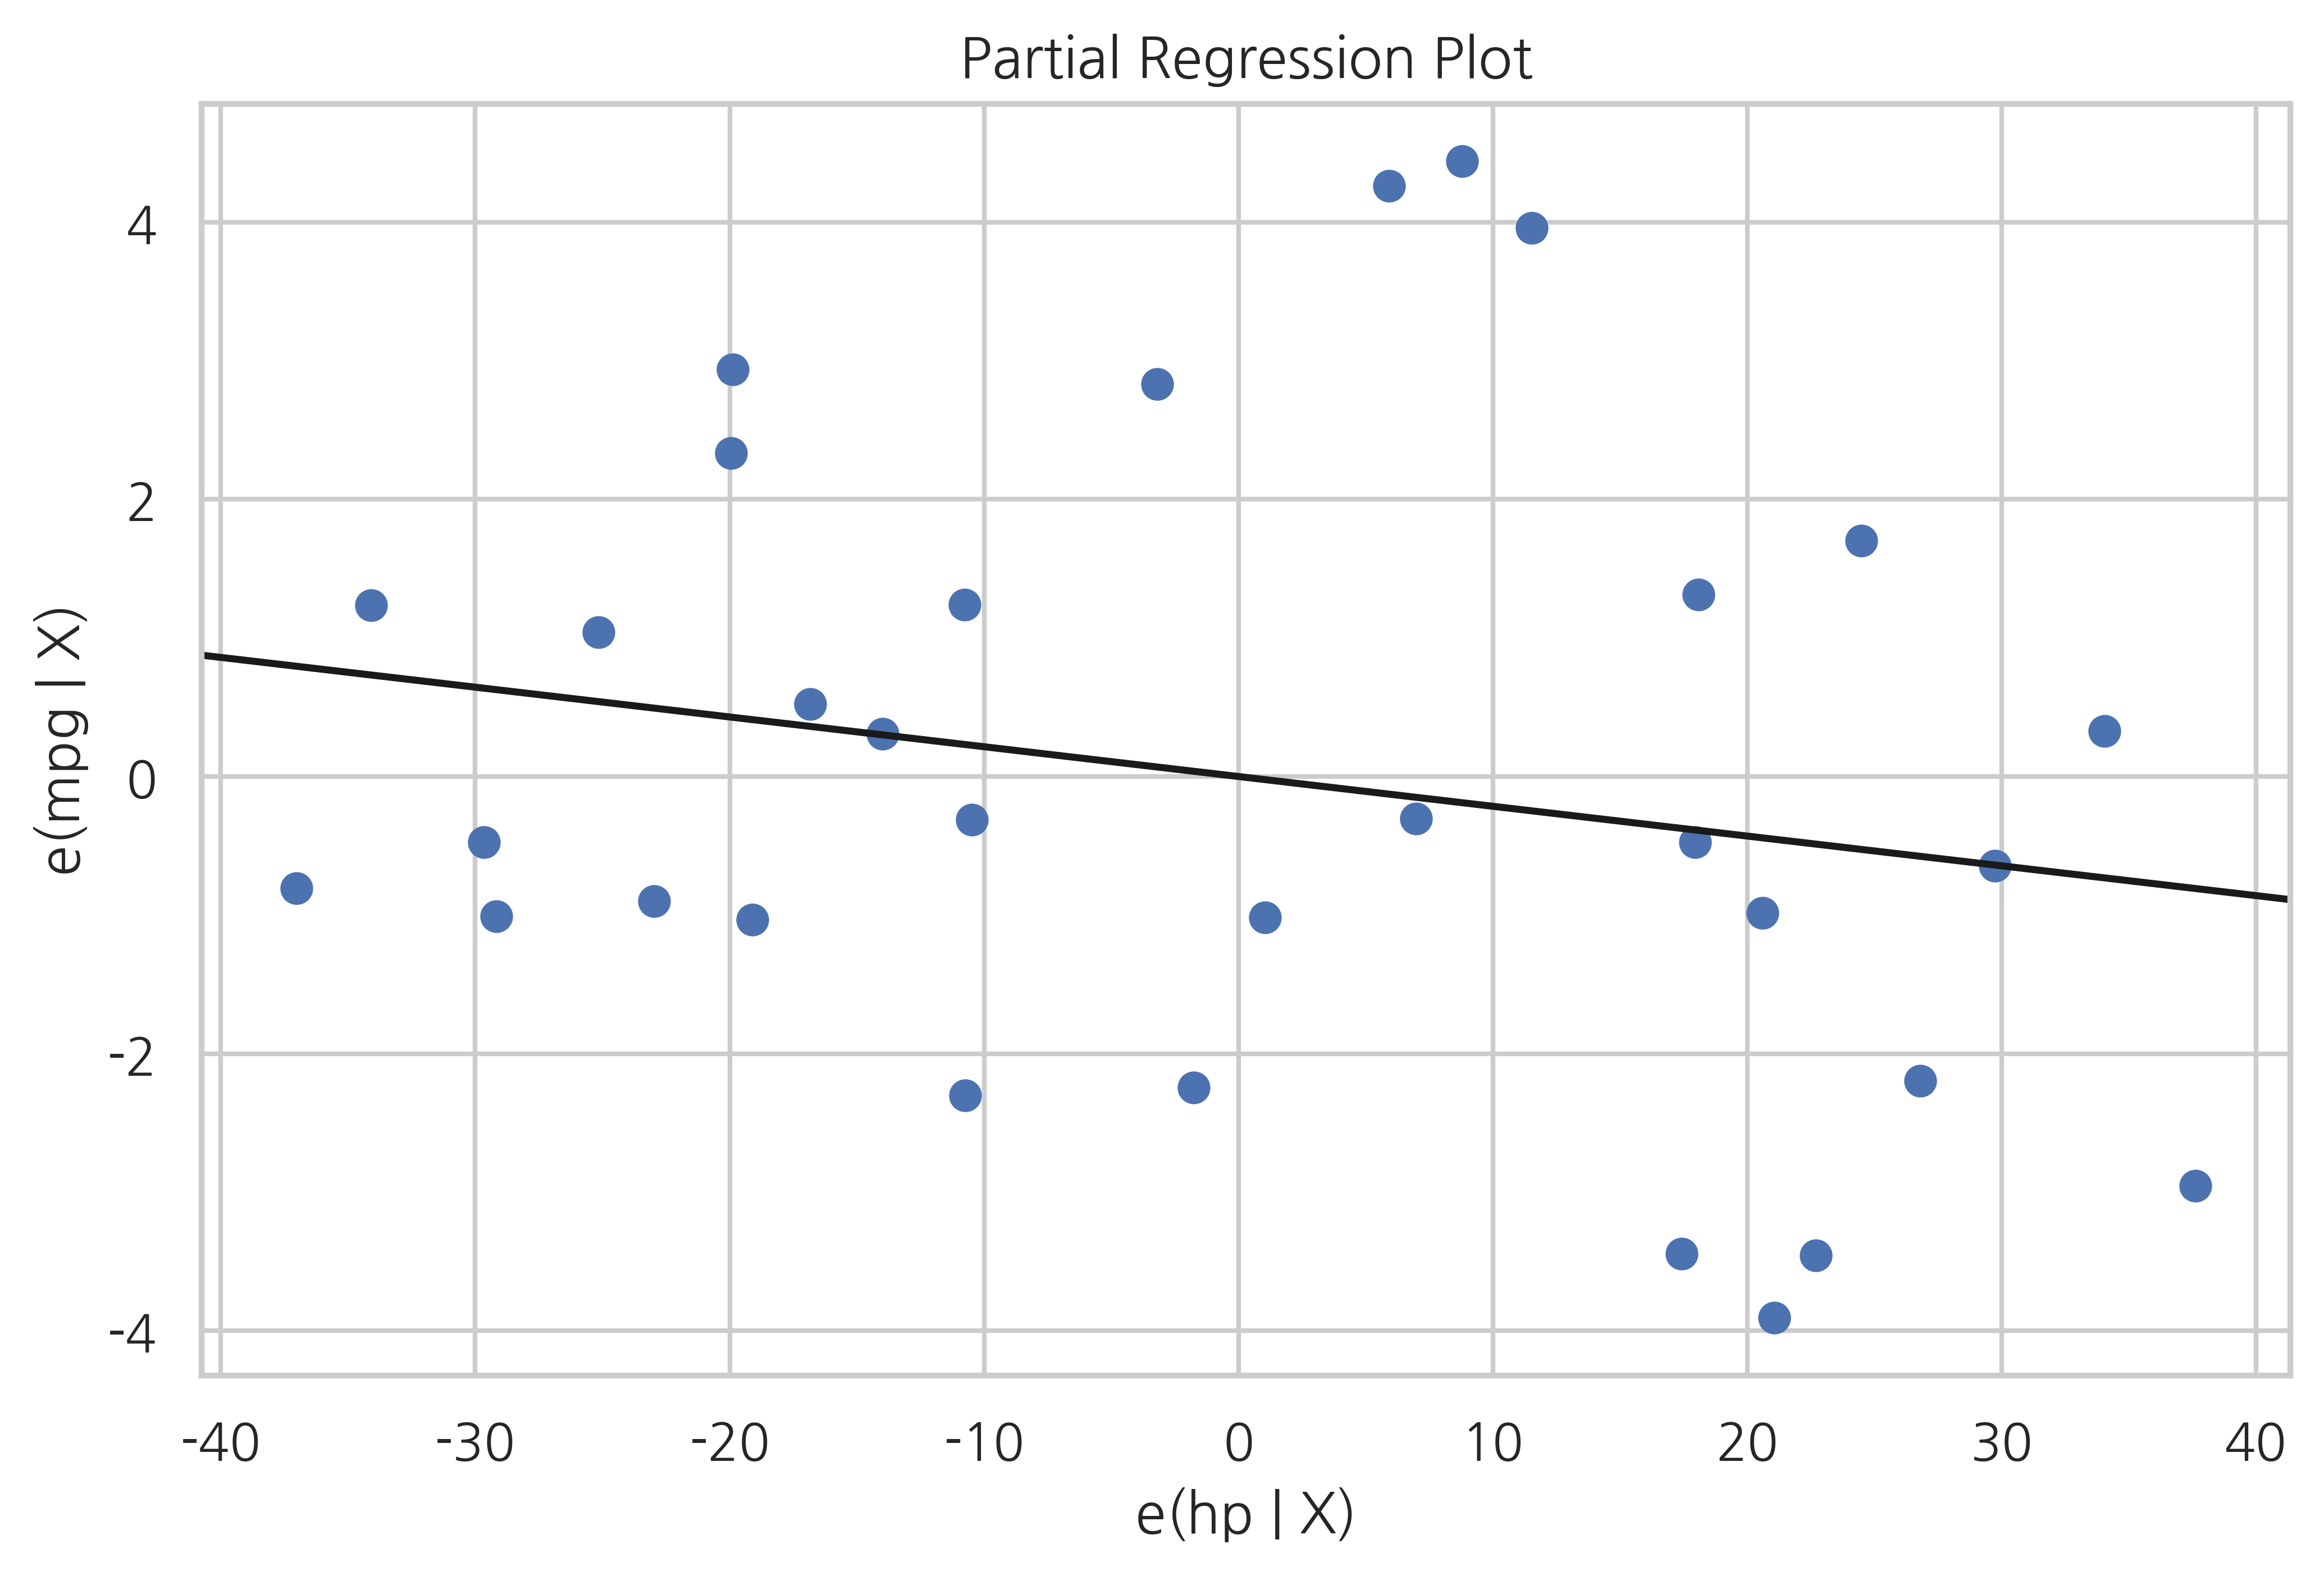

In [20]:
others = list(set(df.columns).difference(set(['mpg', 'hp'])))
p, resids = sm.graphics.plot_partregress('mpg', 'hp', others, data=df, obs_labels=False, ret_coords=True)
plt.show()

- 카테고리 변수는 부분회귀 대신 CCPR plot을 그려본다

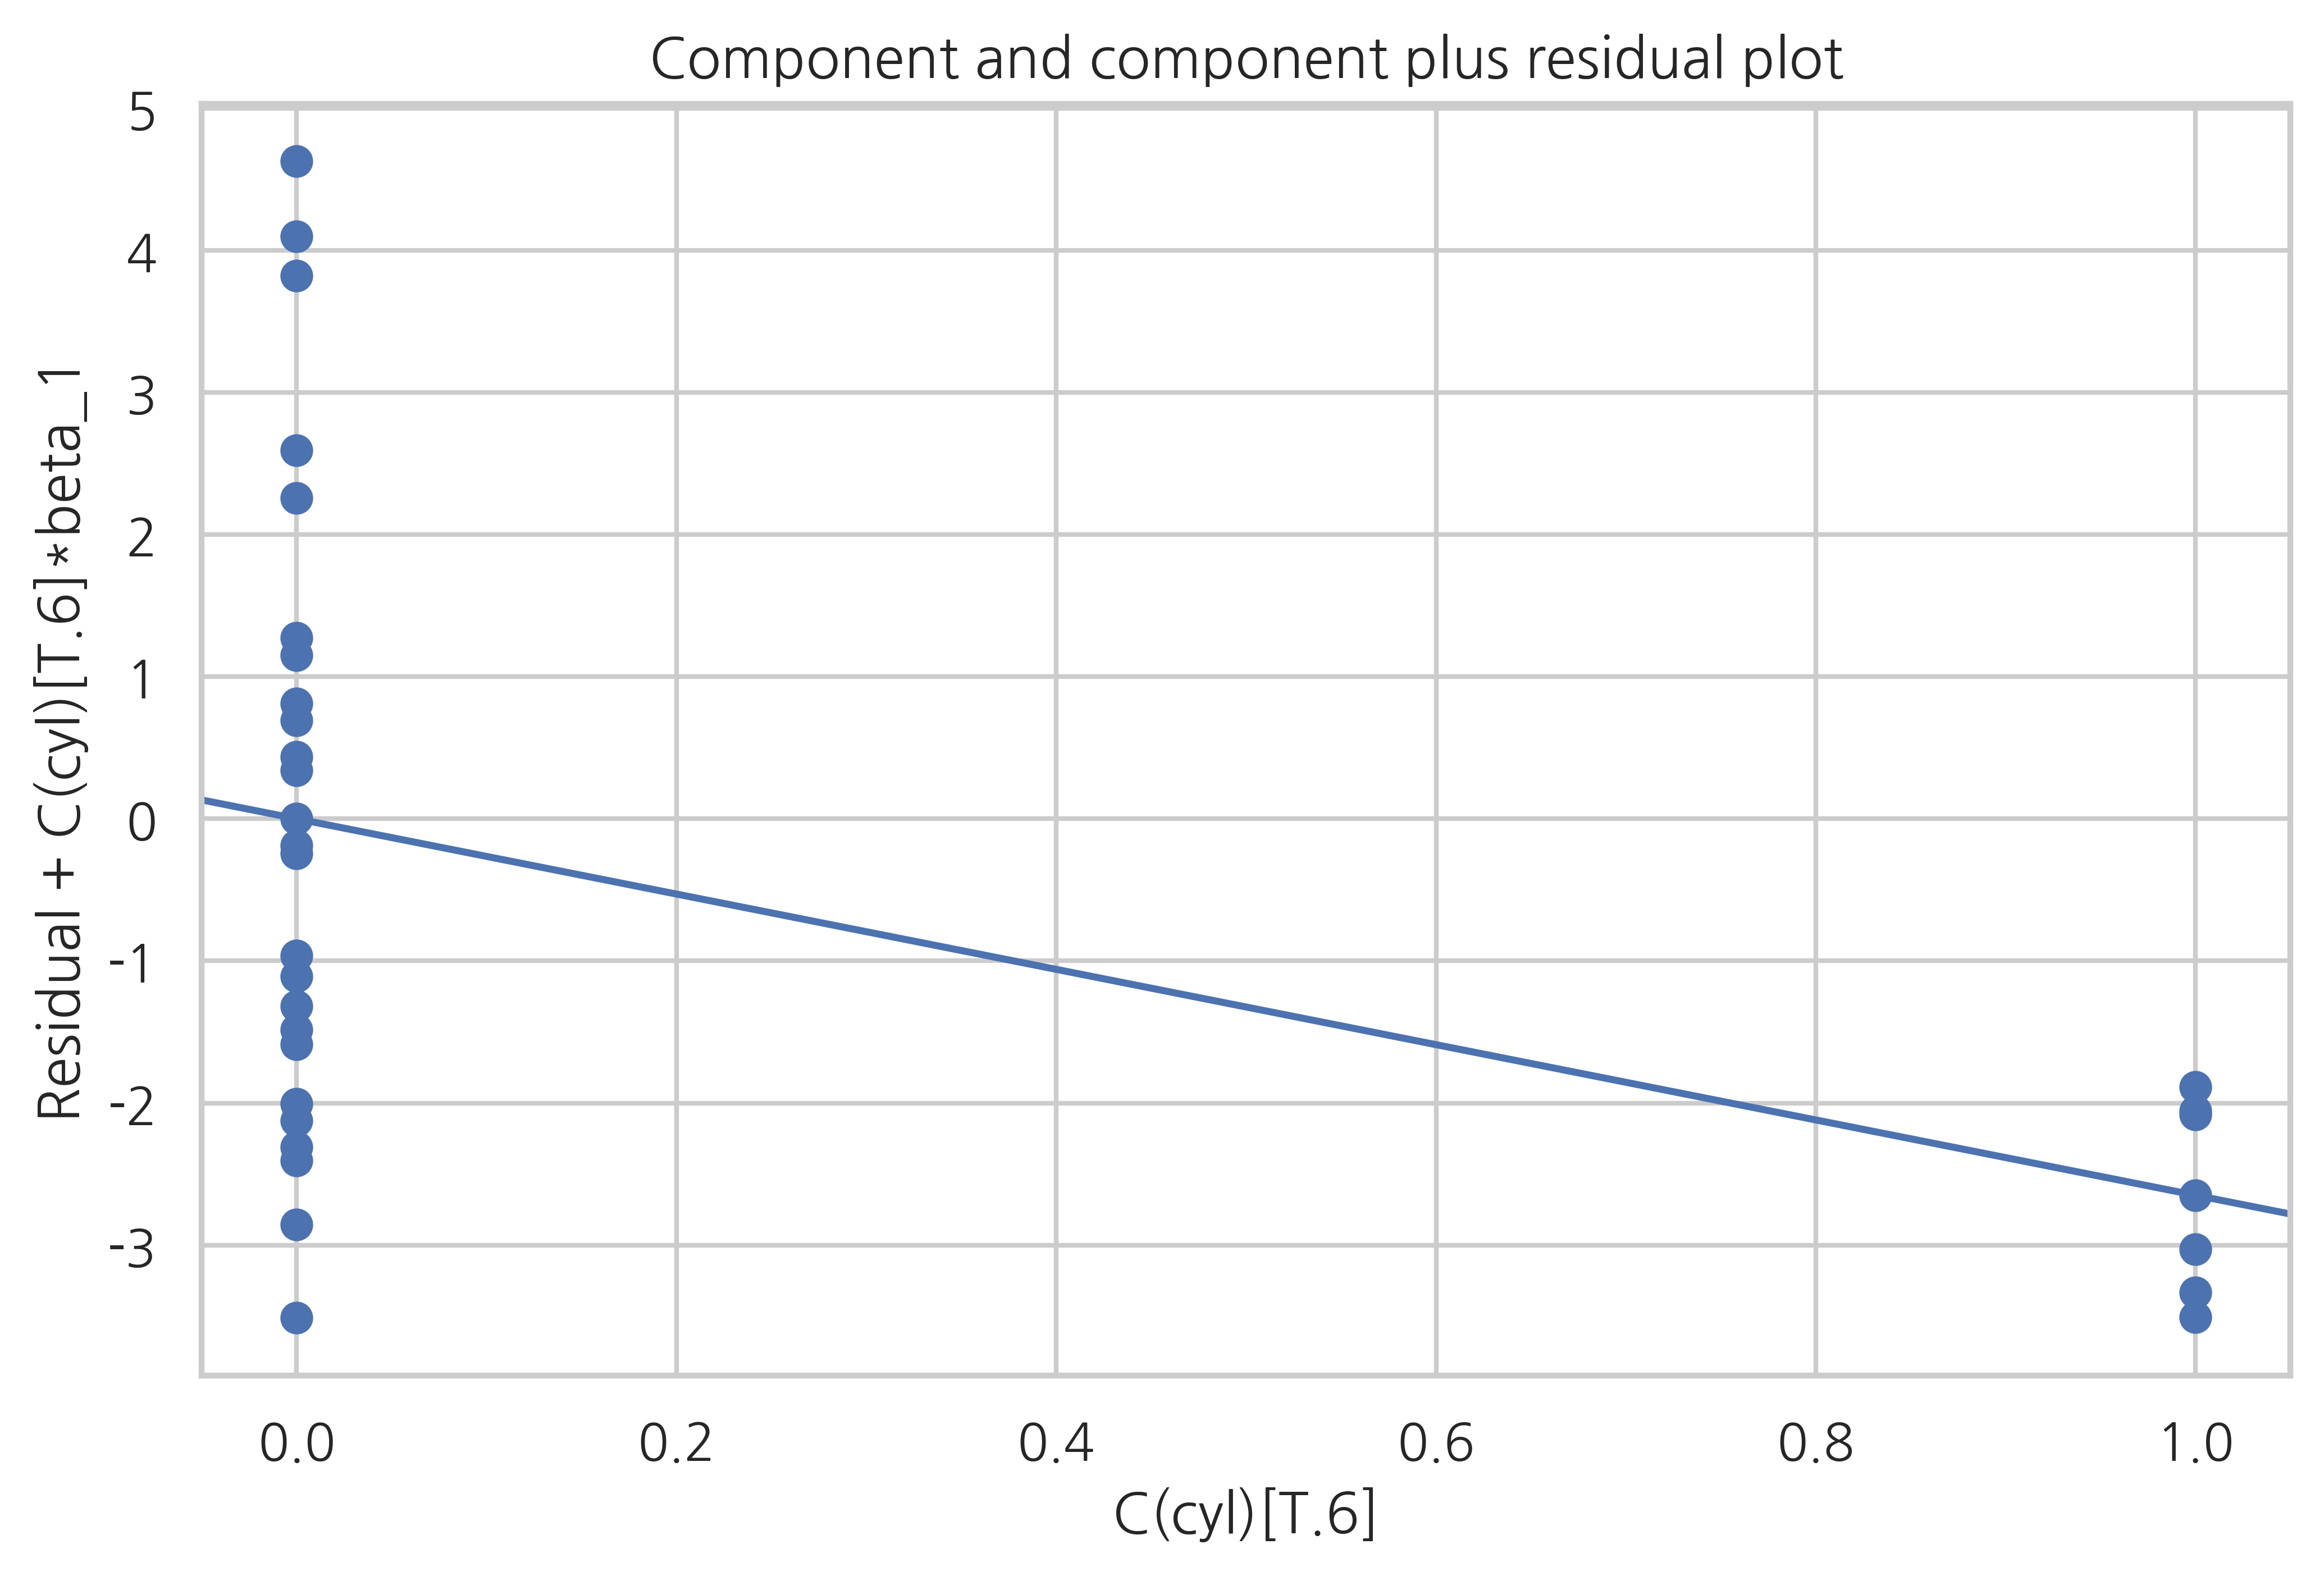

In [123]:
sm.graphics.plot_ccpr(result1, "C(cyl)[T.6]")
plt.show()

x축 0.0 : cyl = 4인경우의 연비 , 1.0 : cyl = 6인 경우의 연비

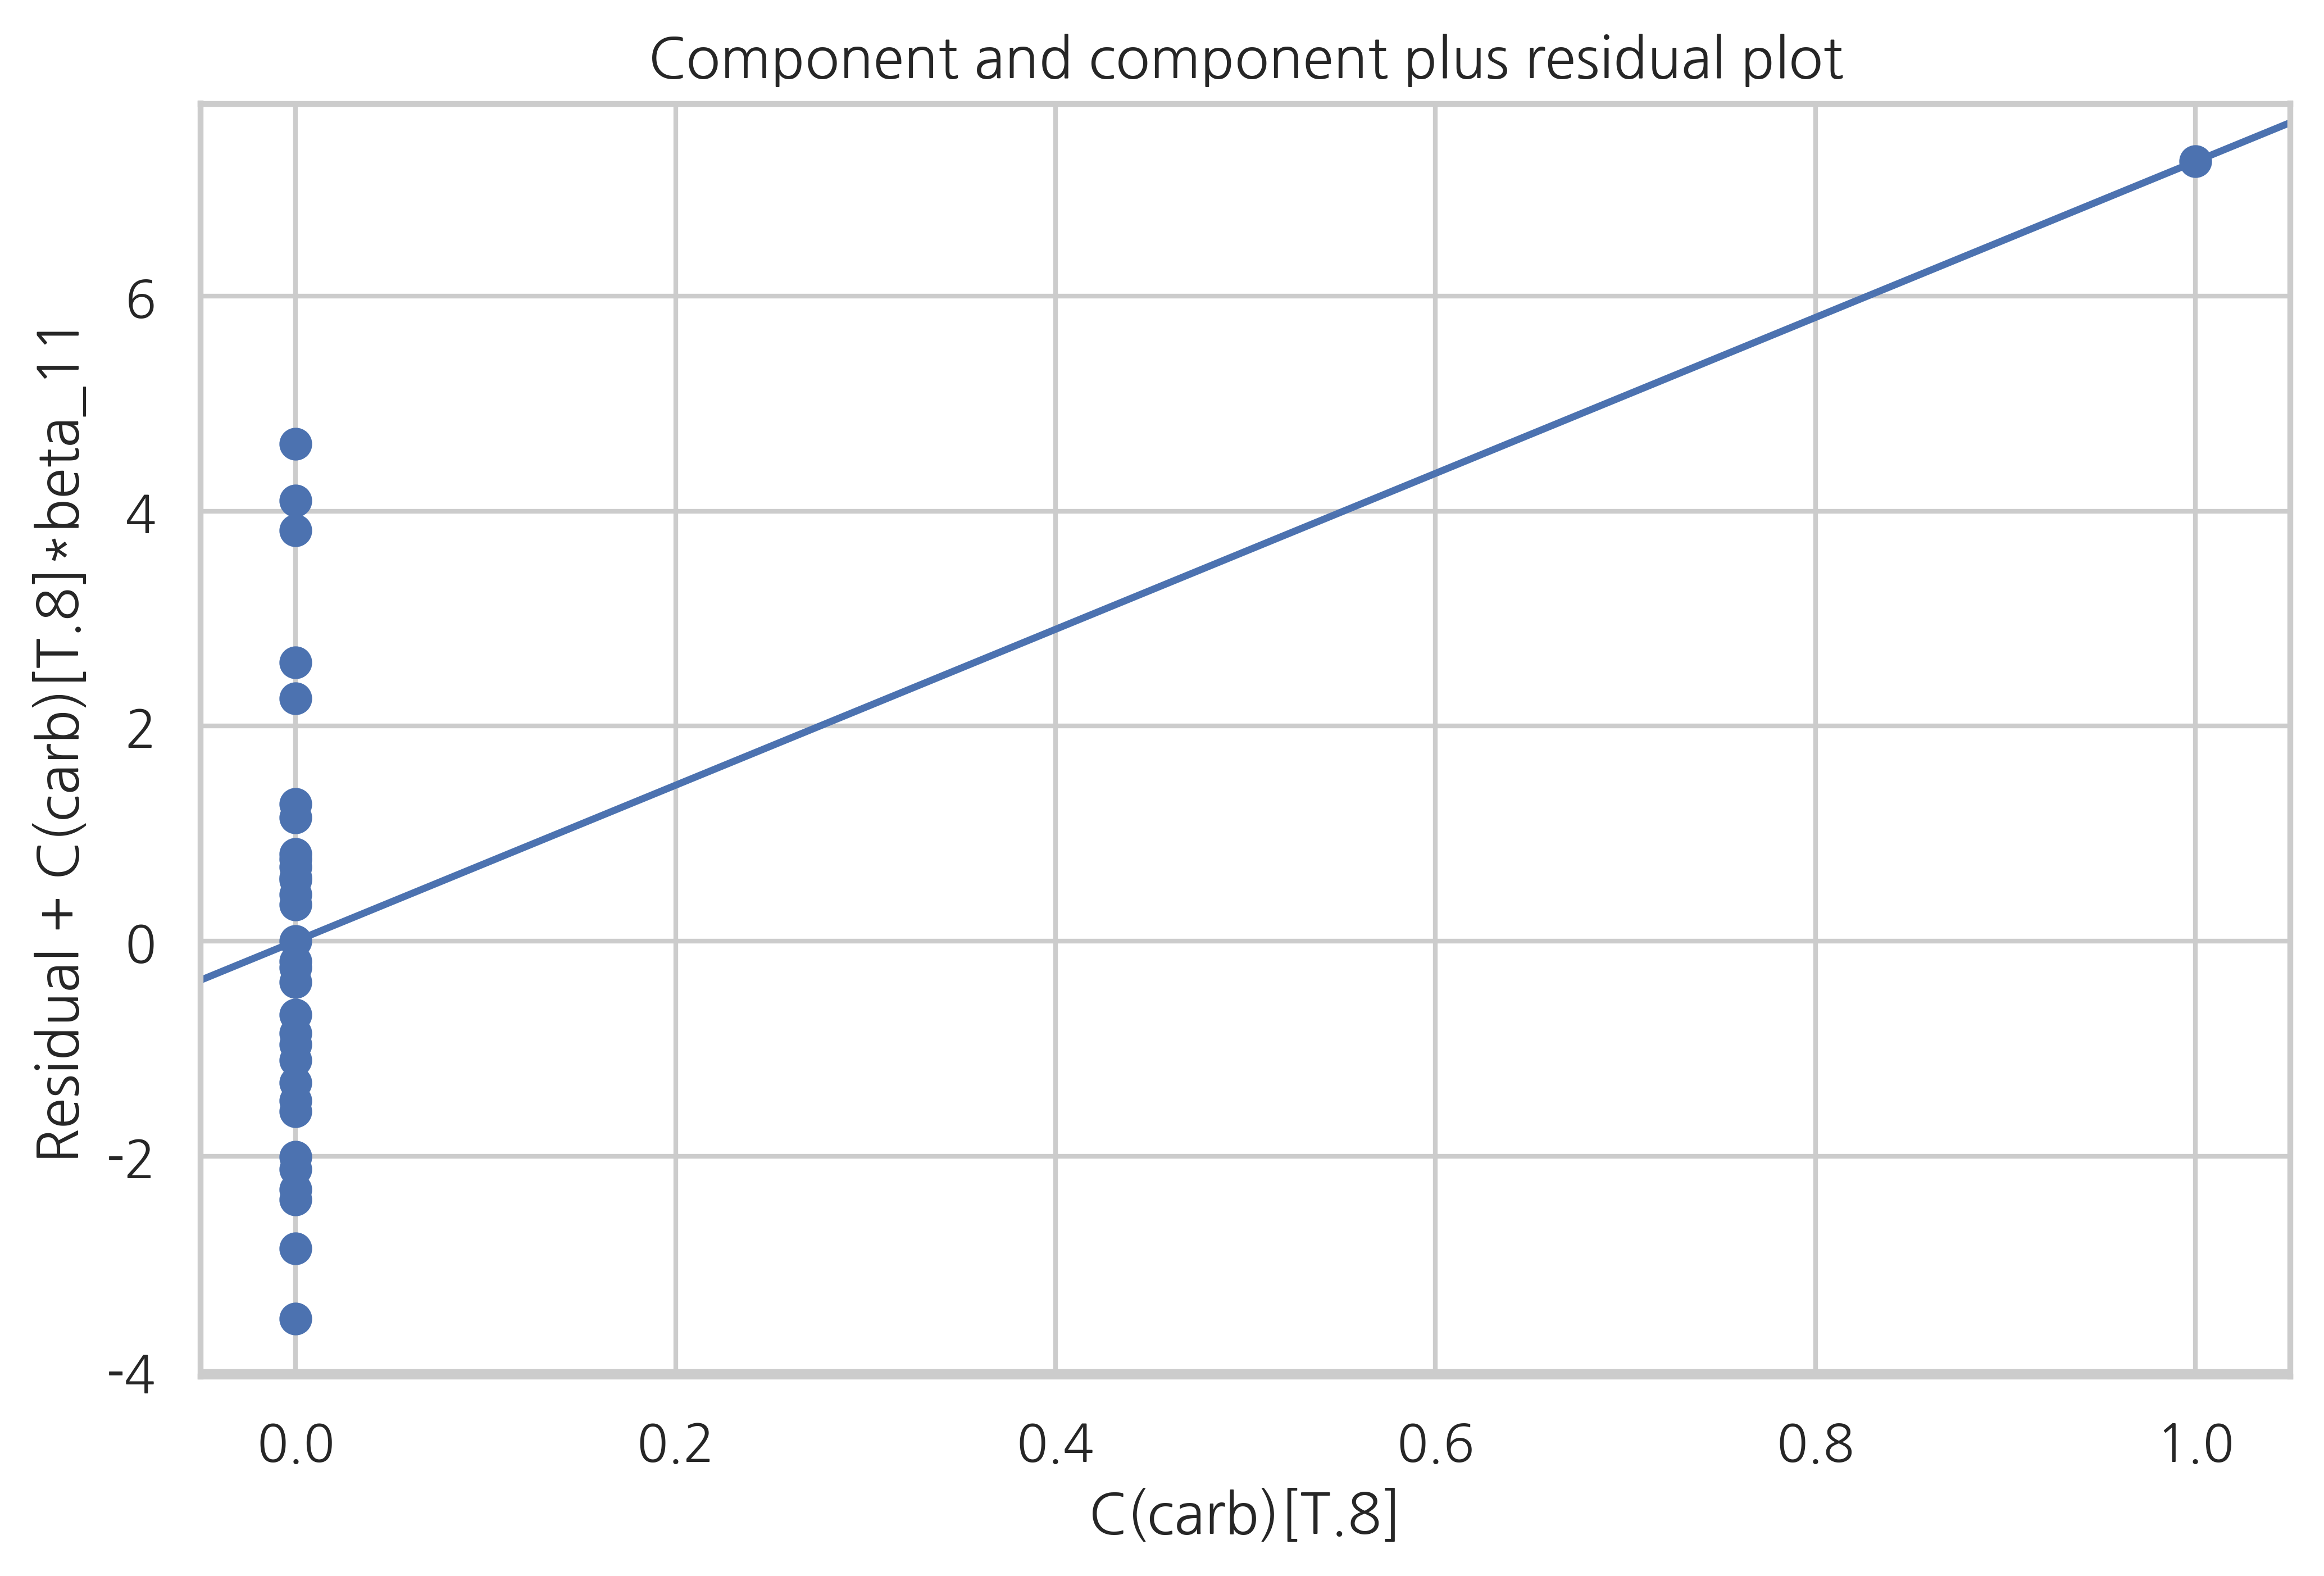

In [124]:
sm.graphics.plot_ccpr(result1, "C(carb)[T.8]")
plt.show()

carb = 8 인 곳의 데이터가 1개이므로 이 데이터는 유의하지 않다

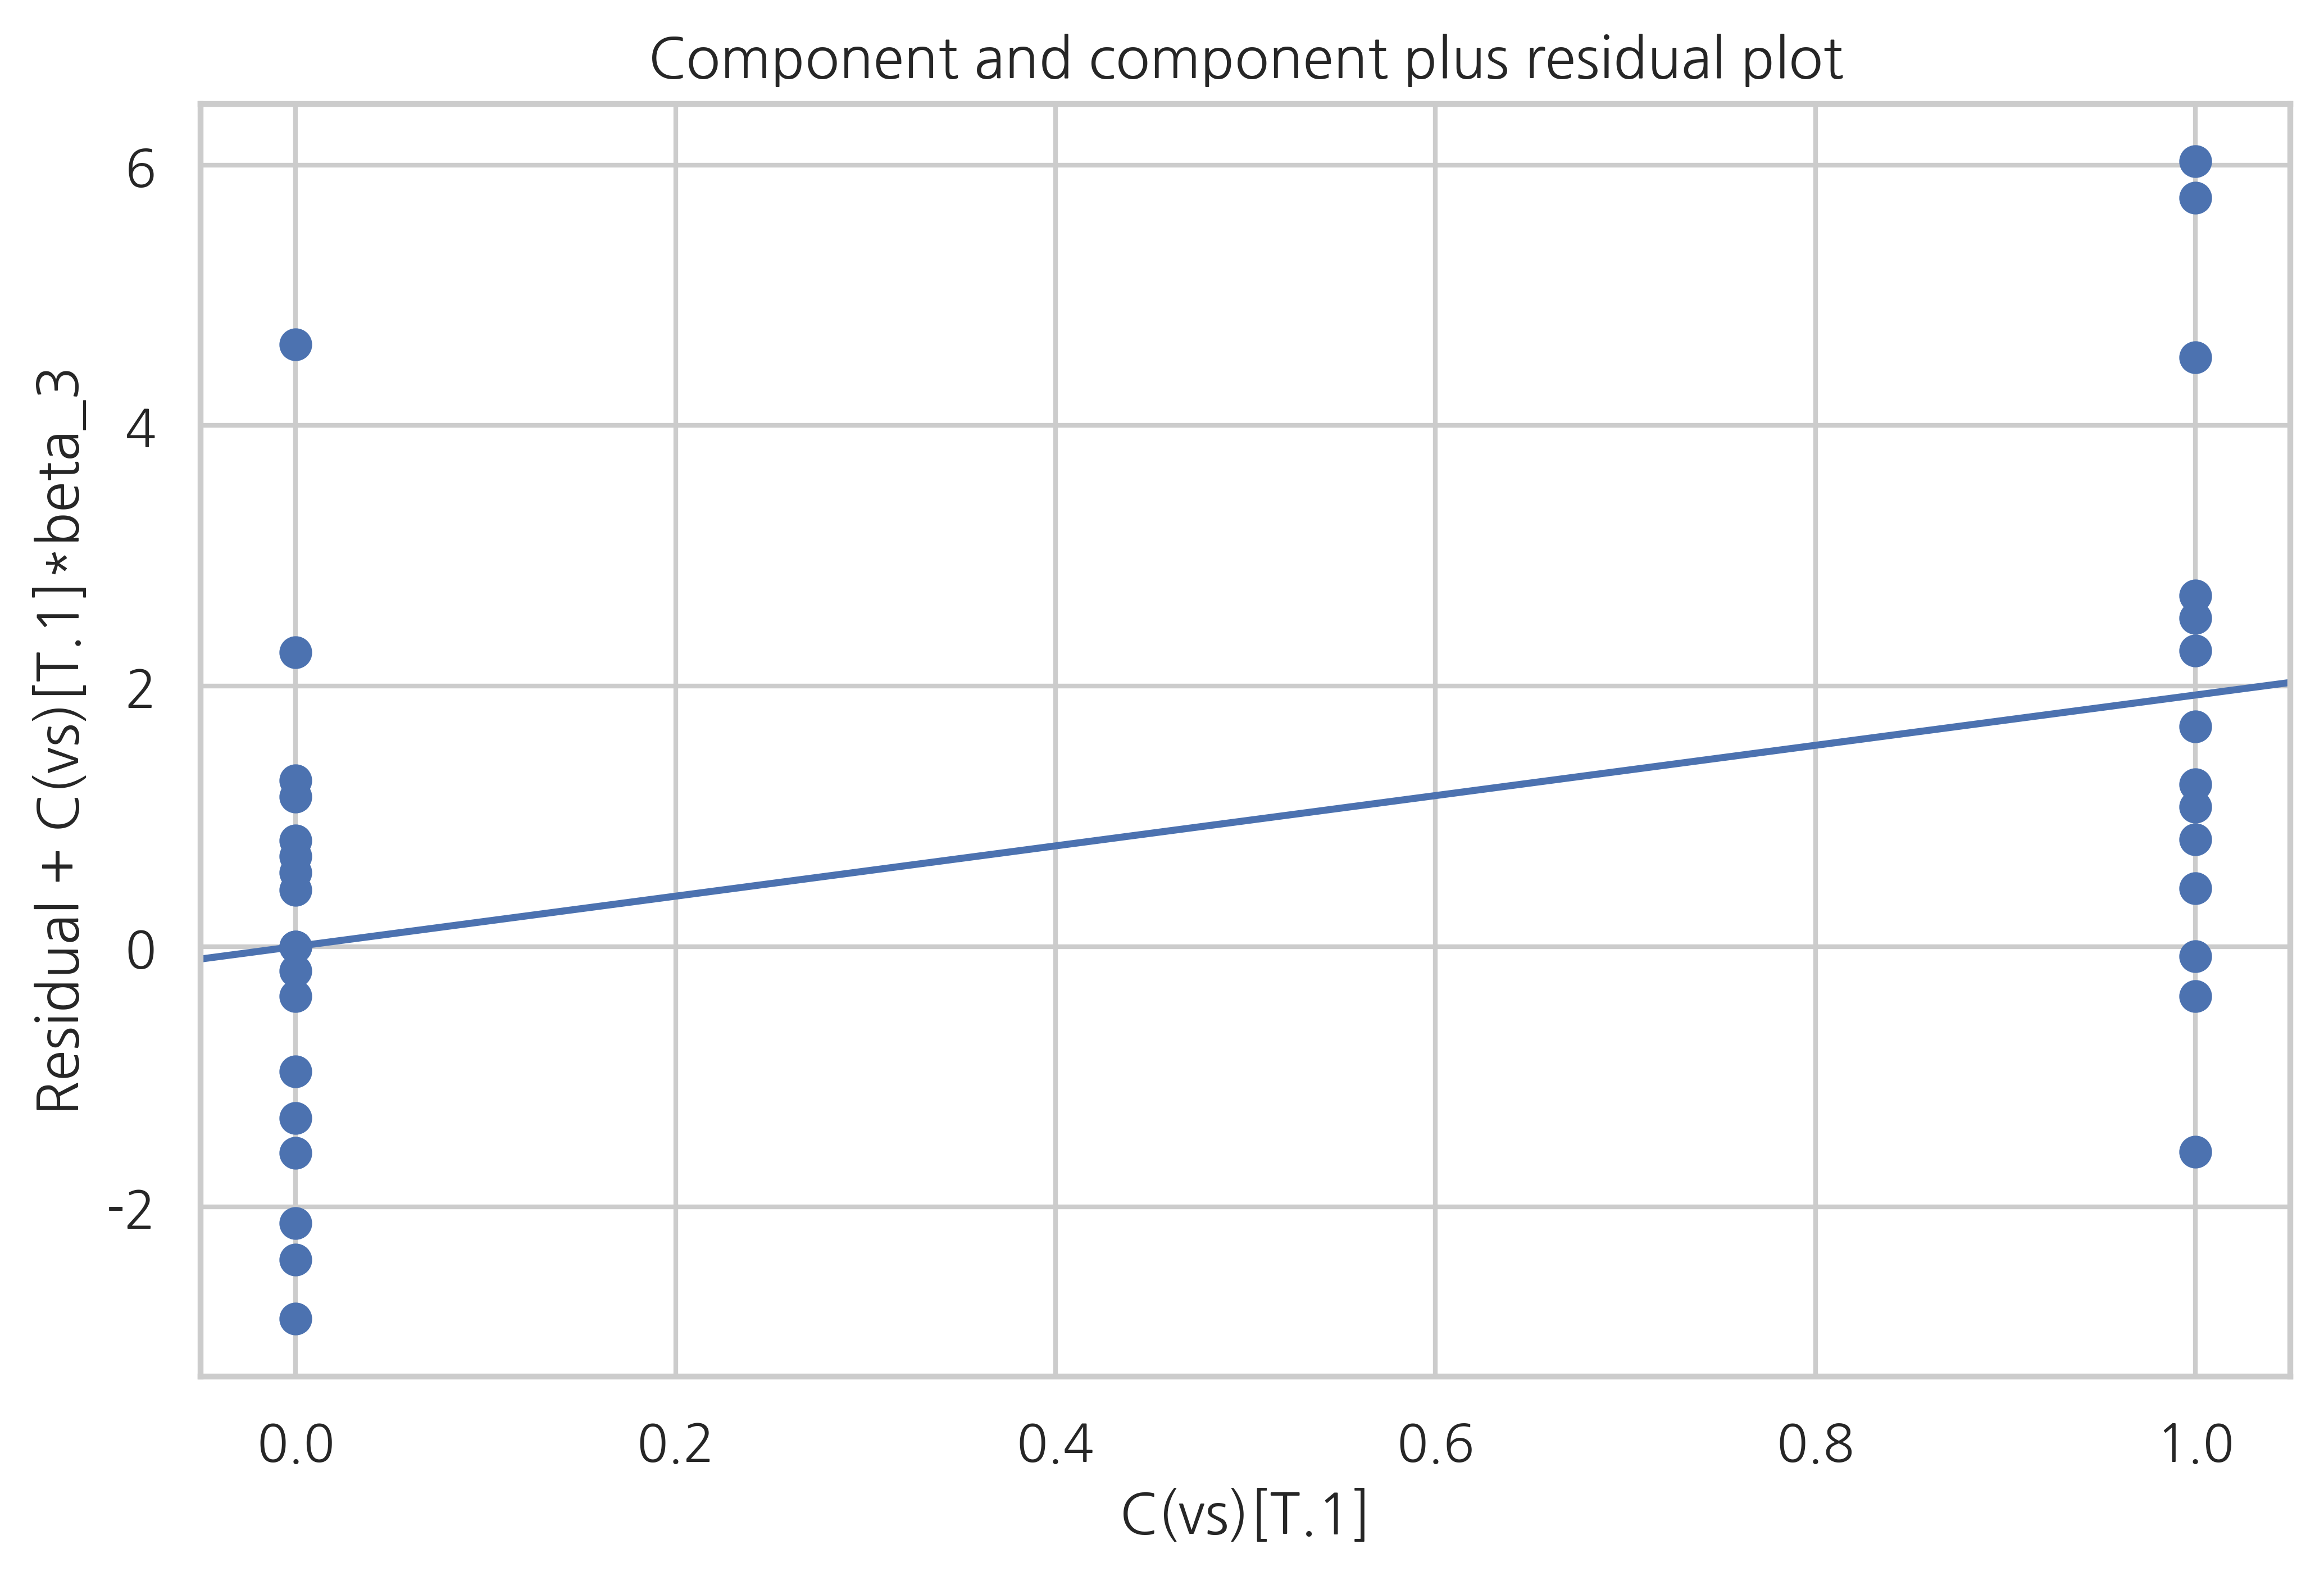

In [127]:
sm.graphics.plot_ccpr(result1, "C(vs)[T.1]")
plt.show()

straight shape인 경우의 데이터는 유의하다